# Import data

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_immo = pd.read_csv("data_immo.csv")

In [4]:
data_immo

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

# Data cleaning

## Drop_duplicates test

In [5]:
without_unnamed = data_immo.drop('Unnamed: 0',axis= 1)

In [6]:
without_unnamed.drop_duplicates()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

      ocean_proximity  
0              INLAND  
1           <1H OCEAN  
2              INLAND  
3           <1H OCEAN  
4              INLAND  
...               ...  
16507          INLAND  
16508        NEAR BAY  
16509          INLAND  
16510       <1H OCEAN  
16511      NEAR OCEAN  

[16512 rows x 10 columns]

--- as we can see there's no duplicates rows in this data and i drop the unnamed() column because they're no correlation between this column and the rest of the data ---

## Missing values

In [7]:
missing_values_count = without_unnamed.isnull().sum()
missing_values_count

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
total_cells = np.product(without_unnamed.shape)
total_missing = missing_values_count.sum()

In [9]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.1065891472868217


--- There's 176 missing values in the column "total_bedrooms".
It's  0.09% of our dataset.---

## Imputation

In [10]:
total_bedrooms_only_nan = without_unnamed[without_unnamed['total_bedrooms'].isna()]
total_bedrooms_only_nan

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
33       -118.23     34.18                45.0       2332.0             NaN   
171      -124.06     40.86                34.0       4183.0             NaN   
178      -121.08     39.22                30.0       2188.0             NaN   
179      -120.98     37.66                10.0        934.0             NaN   
259      -122.10     40.03                25.0       2516.0             NaN   
...          ...       ...                 ...          ...             ...   
16002    -119.73     34.44                38.0       1729.0             NaN   
16089    -122.28     37.51                33.0       4719.0             NaN   
16214    -118.28     34.06                42.0       2472.0             NaN   
16228    -122.23     38.17                45.0        350.0             NaN   
16323    -119.78     36.82                25.0       5016.0             NaN   

       population  households  median_income  median_house_value  \
33          943.0       339.0         8.1132            446600.0   
171        1891.0       669.0         3.2216             98100.0   
178        1033.0       437.0         2.1419            105200.0   
179         401.0       255.0         0.9336            127100.0   
259        1266.0       494.0         1.7566             58400.0   
...           ...         ...            ...                 ...   
16002       801.0       395.0         3.1364            357500.0   
16089      1980.0       757.0         6.1064            405000.0   
16214      3795.0      1179.0         1.2254            162500.0   
16228       225.0        72.0         1.8942            216700.0   
16323      2133.0       928.0         3.6250             89500.0   

      ocean_proximity  
33          <1H OCEAN  
171        NEAR OCEAN  
178            INLAND  
179            INLAND  
259            INLAND  
...               ...  
16002      NEAR OCEAN  
16089      NEAR OCEAN  
16214       <1H OCEAN  
16228        NEAR BAY  
16323          INLAND  

[176 rows x 10 columns]

In [11]:
med_total_bedrooms = without_unnamed["total_bedrooms"].median()
med_total_bedrooms

435.0

--- I decided to keep 2 dataset, one without imputation and one with. ---

In [12]:
data_immo_with_imputation = without_unnamed

In [13]:
data_immo_with_imputation['total_bedrooms'] = without_unnamed.total_bedrooms.fillna(435.0)

In [14]:
data_immo_with_imputation.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.84     36.77                 6.0       1853.0           473.0   
1    -117.80     33.68                 8.0       2032.0           349.0   
2    -120.19     36.60                25.0        875.0           214.0   
3    -118.32     34.10                31.0        622.0           229.0   
4    -121.23     37.79                21.0       1922.0           373.0   

   population  households  median_income  median_house_value ocean_proximity  
0      1397.0       417.0         1.4817             72000.0          INLAND  
1       862.0       340.0         6.9133            274100.0       <1H OCEAN  
2       931.0       214.0         1.5536             58300.0          INLAND  
3       597.0       227.0         1.5284            200000.0       <1H OCEAN  
4      1130.0       372.0         4.0815            117900.0          INLAND

In [15]:
data_immo_with_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


--- Now we have 2 dataset: data_immo and data_immo_with_imputation ---

## Scaling

In [16]:
data_immo_with_imputation['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [57]:
data_immo_with_imputation['ocean_proximity_number'] = data_immo_with_imputation['ocean_proximity'].replace(['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'], [0,1,2,3,4])

In [58]:
without_unnamed['ocean_proximity_number'] = without_unnamed['ocean_proximity'].replace(['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'], [0,1,2,3,4])

In [20]:
immo_with_imputation = data_immo_with_imputation.drop('ocean_proximity',axis = 1)

In [19]:
immo = without_unnamed.drop('ocean_proximity',axis = 1)

In [21]:
columns = np.array(immo.drop(['longitude','latitude'],axis = 1).columns)

In [22]:
columns_with = np.array(immo_with_imputation.drop(['longitude','latitude'],axis = 1).columns)

In [63]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [64]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

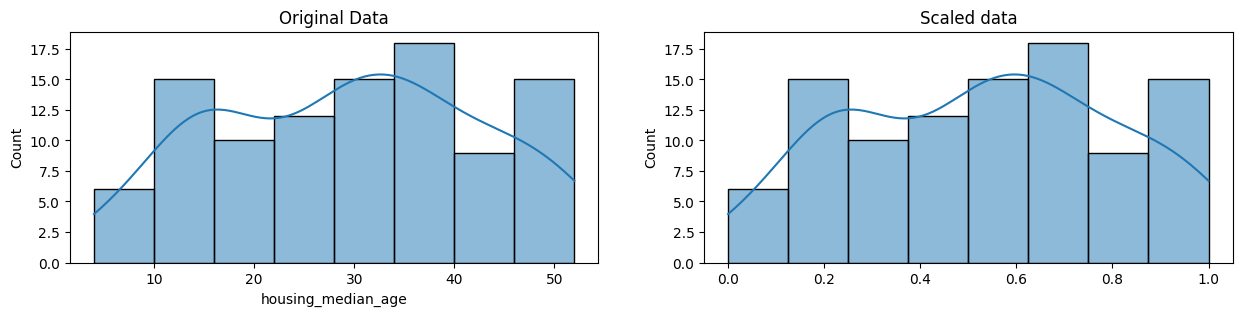

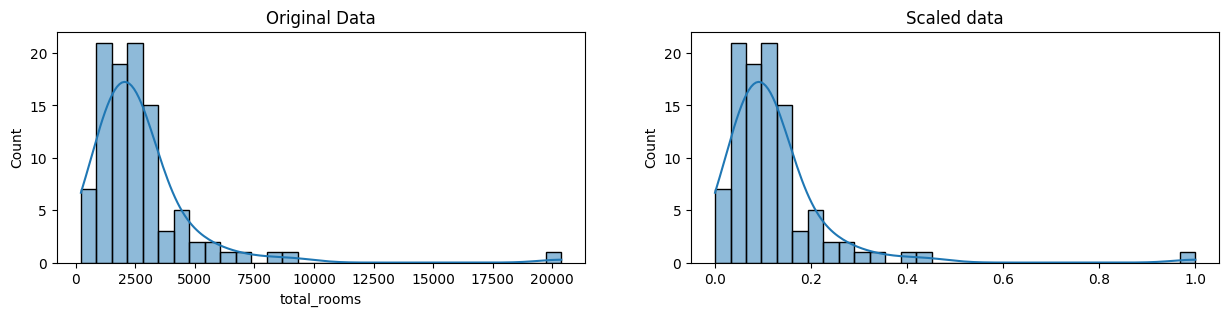

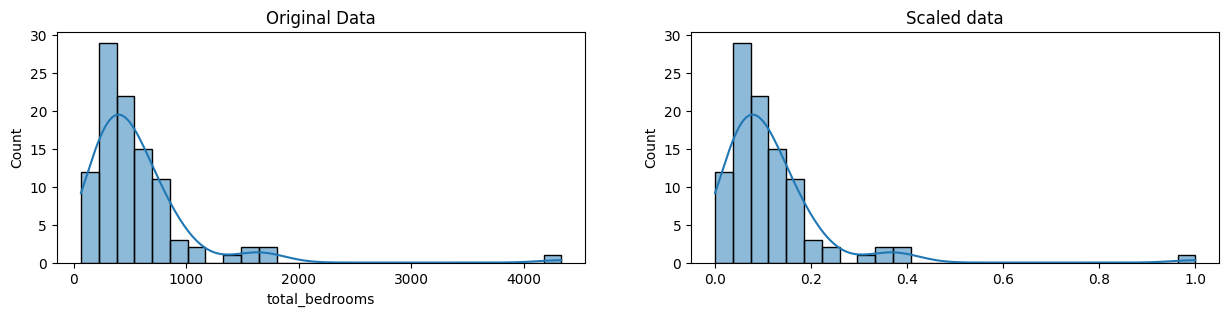

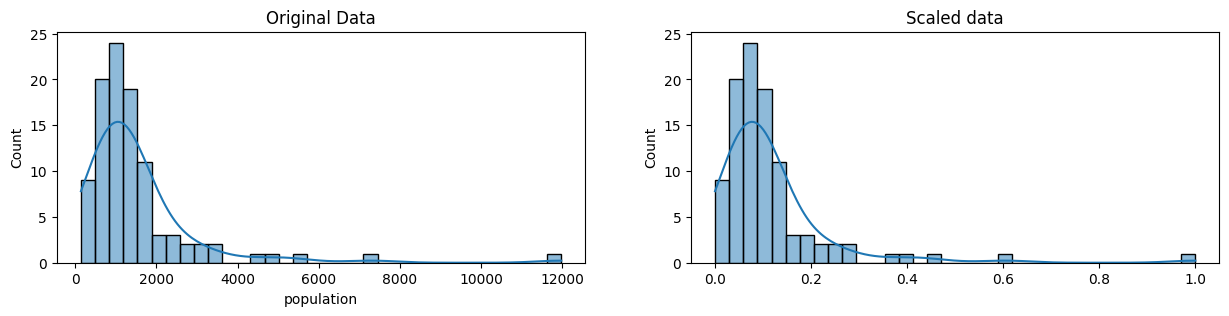

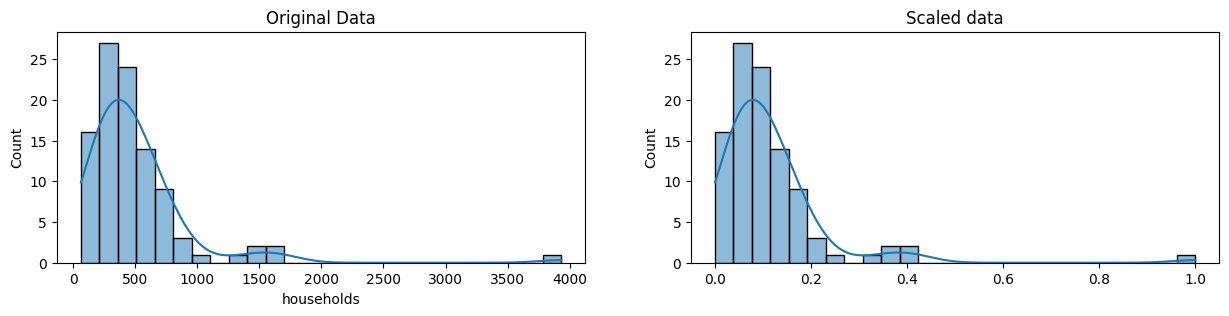

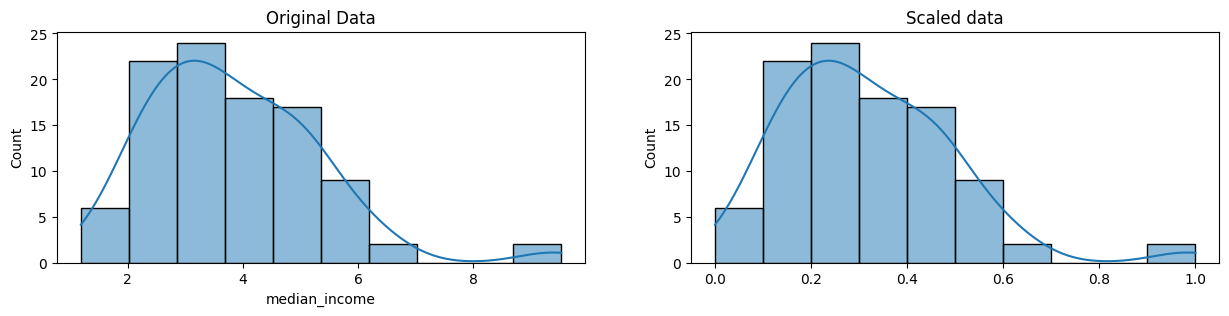

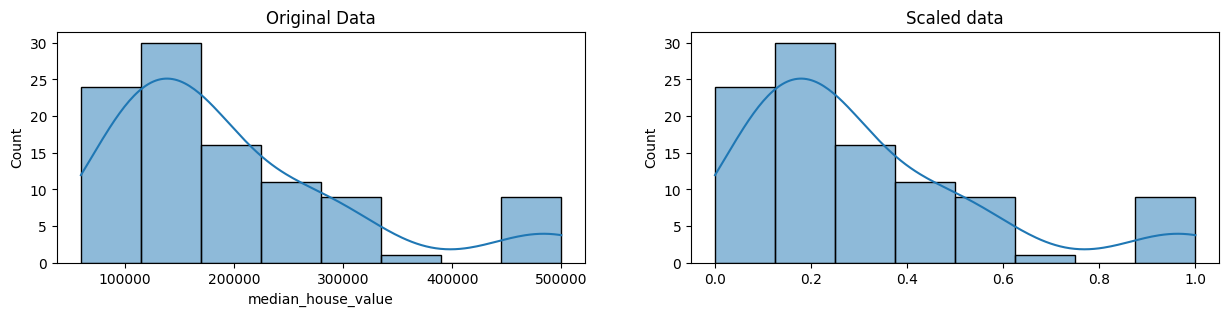

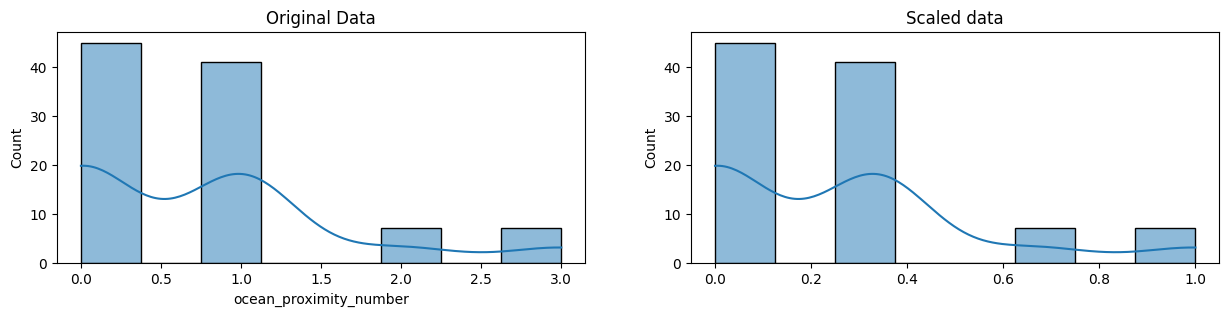

In [65]:
for i in columns:
    original_data = immo[i].sample(n=100, random_state = 1)

    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scaling(original_data, columns=[0])

    # plot both together to compare
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled data")
    plt.show()

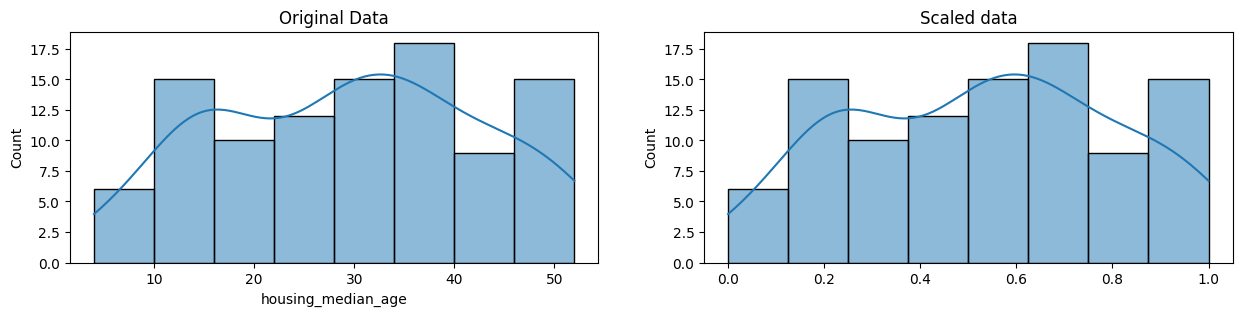

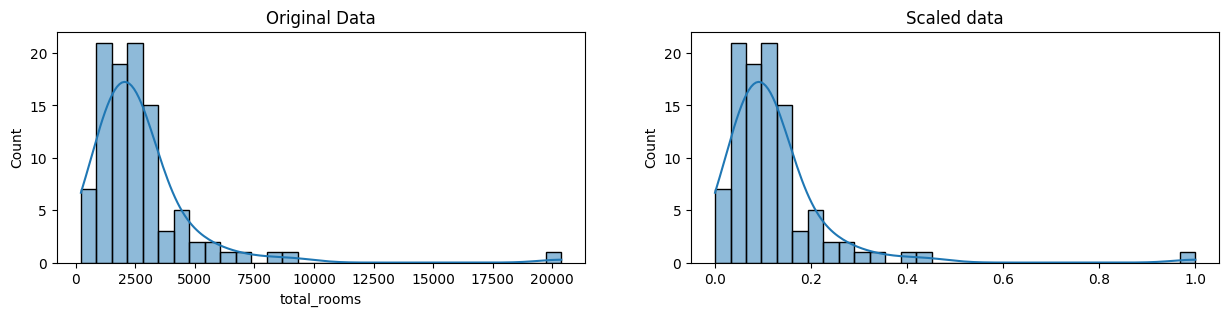

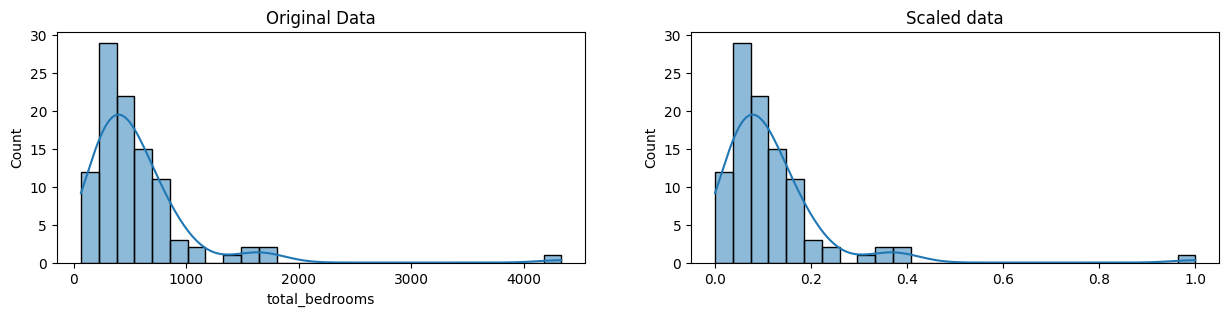

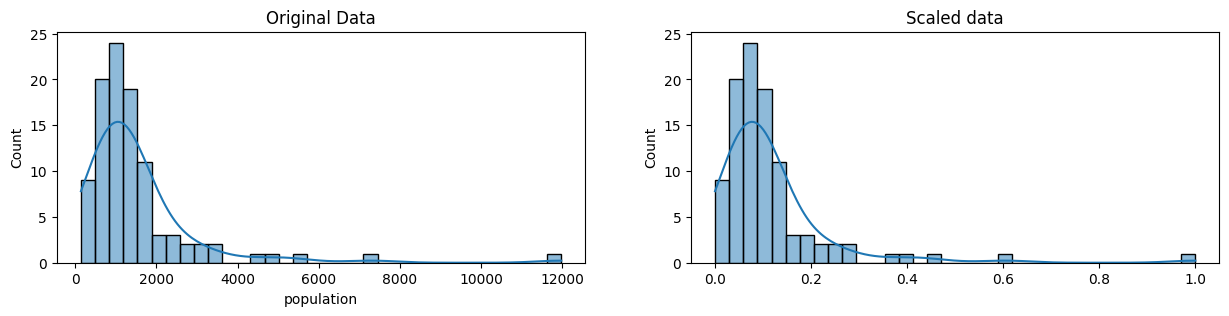

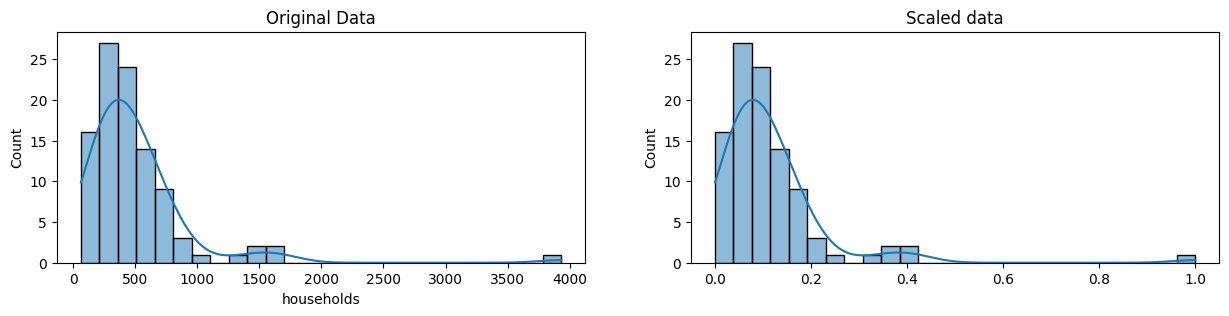

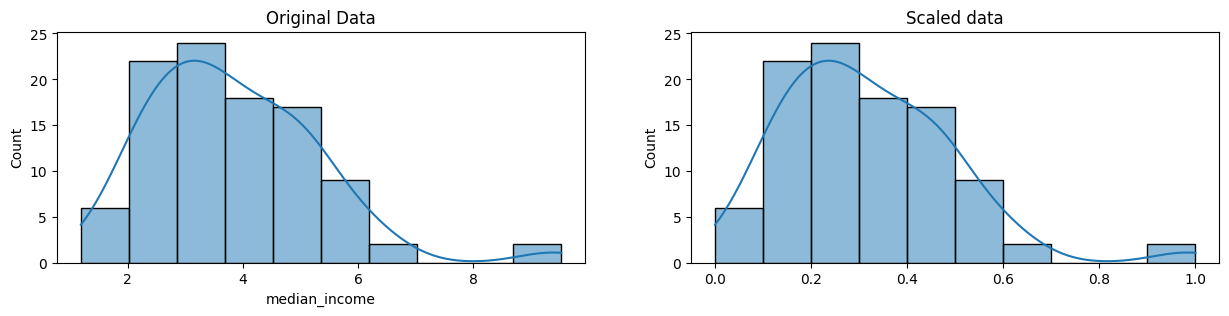

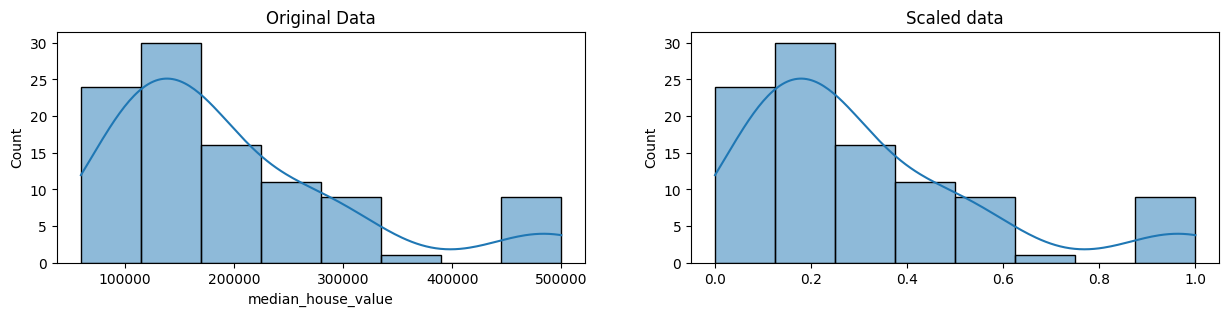

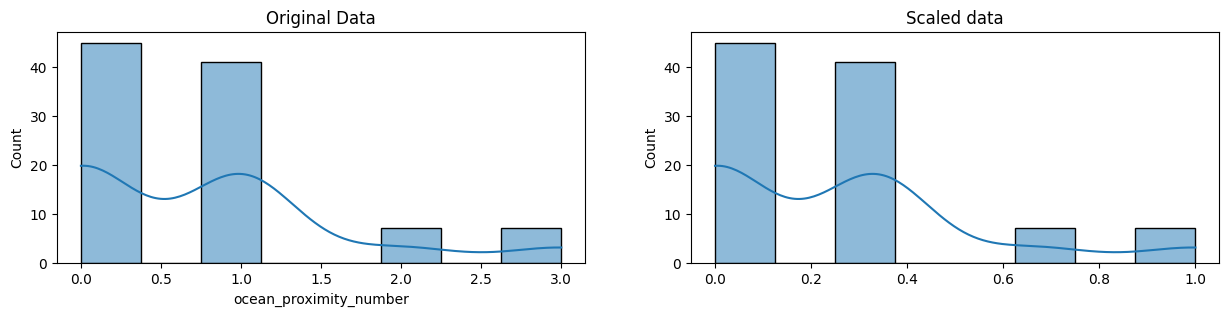

In [66]:
# generate 1000 data points randomly drawn from an exponential distribution
for i in columns_with:
    original_data = immo_with_imputation[i].sample(n=100, random_state = 1)

    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scaling(original_data, columns=[0])

    # plot both together to compare
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled data")
    plt.show()

## Normalization

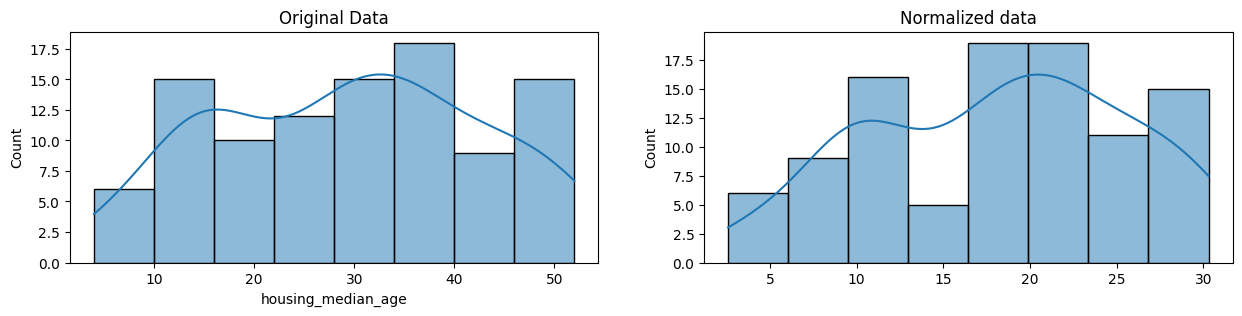

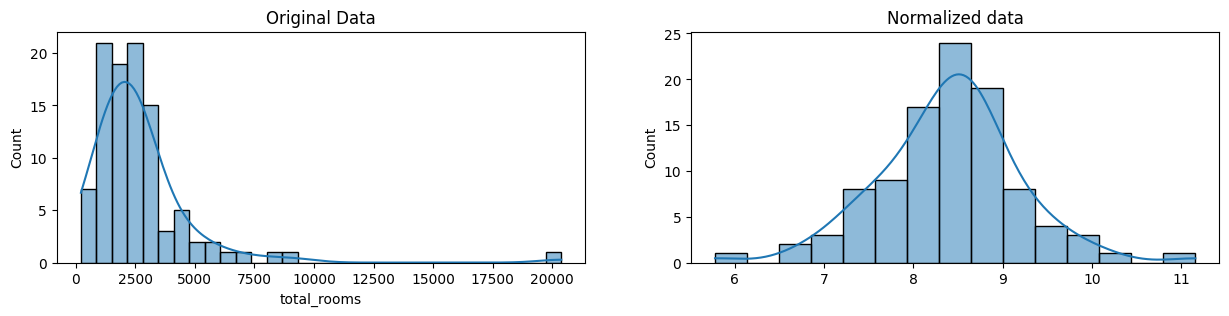

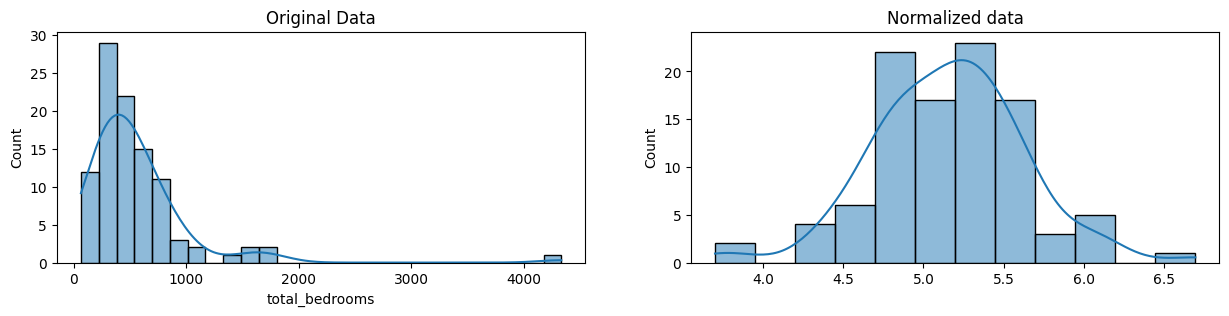

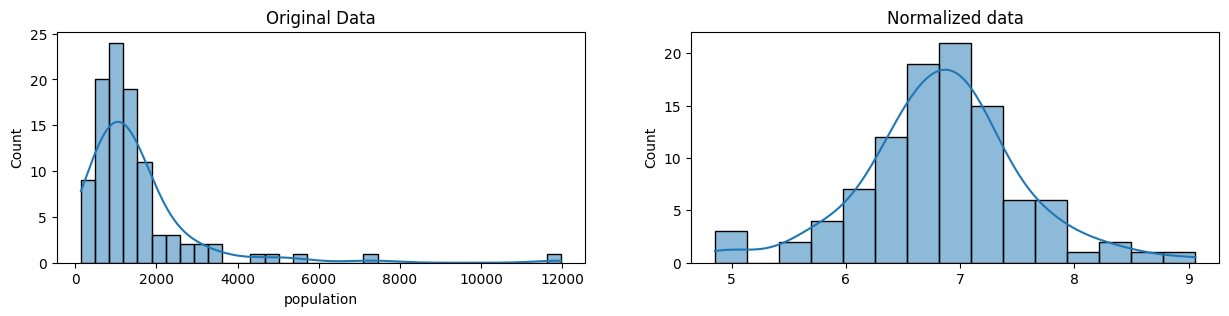

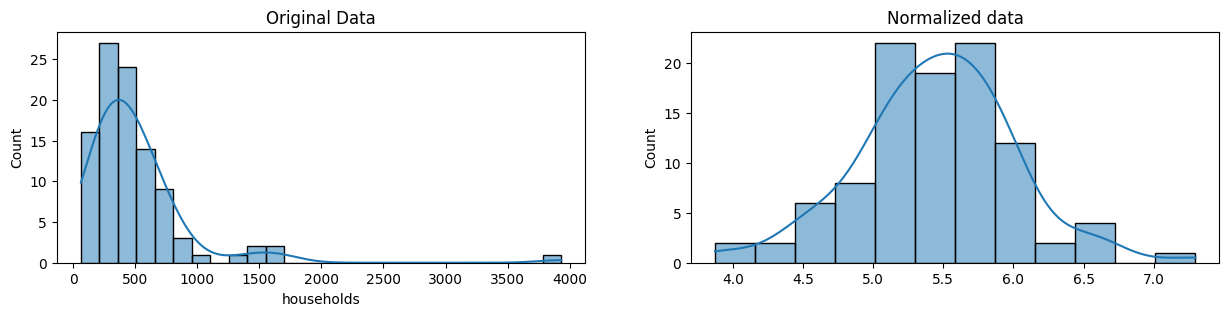

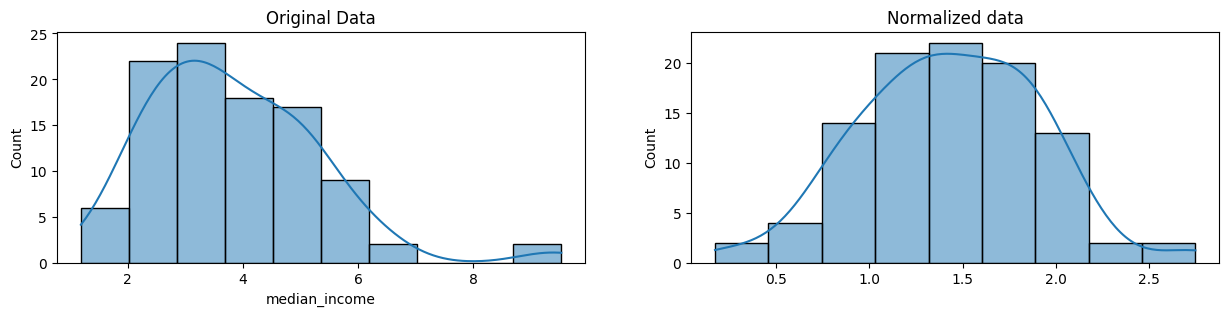

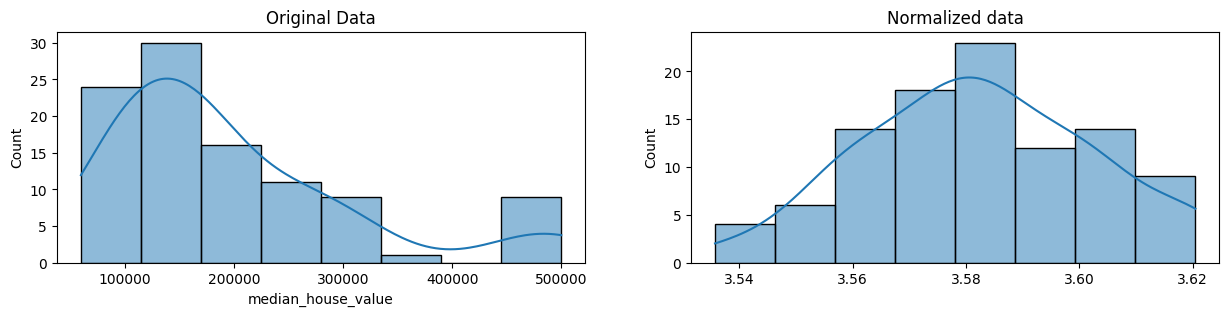

ValueError: Data must be positive.

In [67]:
# normalize the exponential data with boxcox
for i in columns:
    original_data = immo[i].sample(n=100, random_state = 1)
    normalized_data = stats.boxcox(original_data)

    # plot both together to compare
    fig, ax=plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Normalized data")
    plt.show()

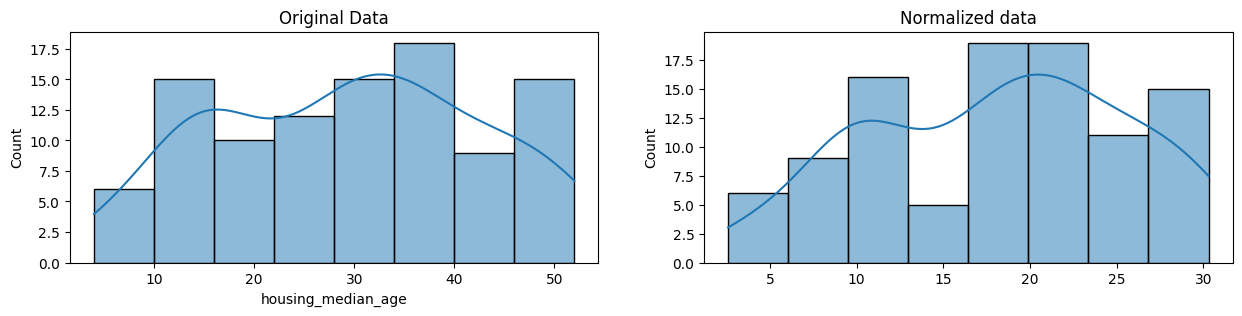

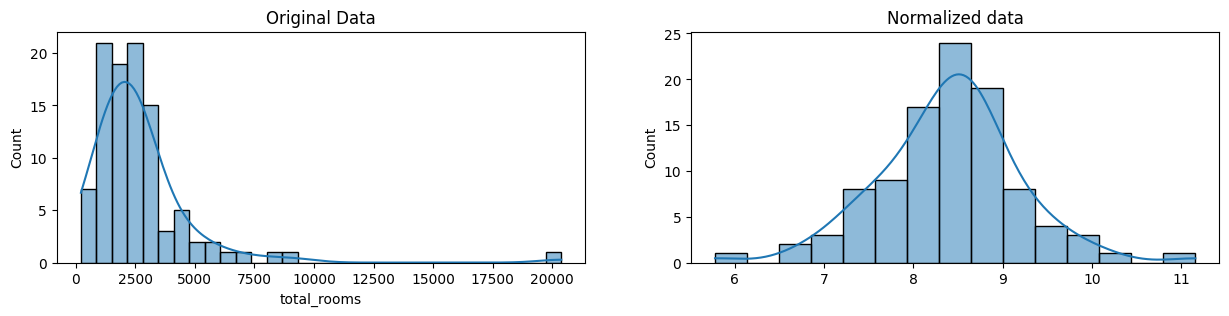

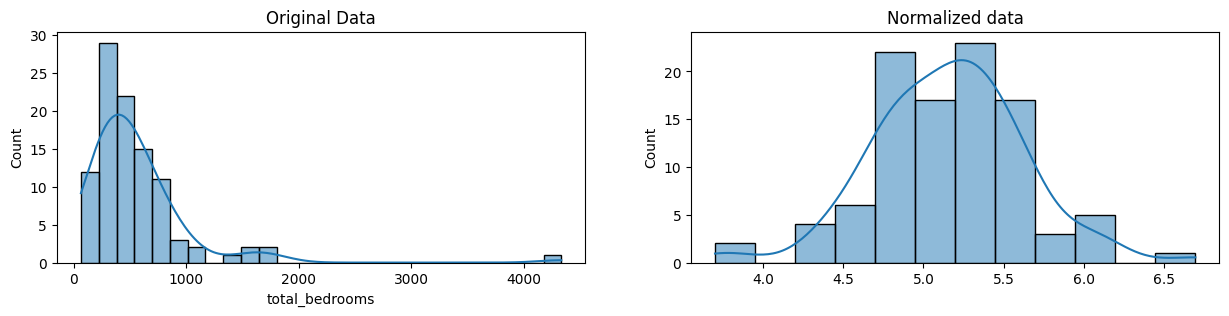

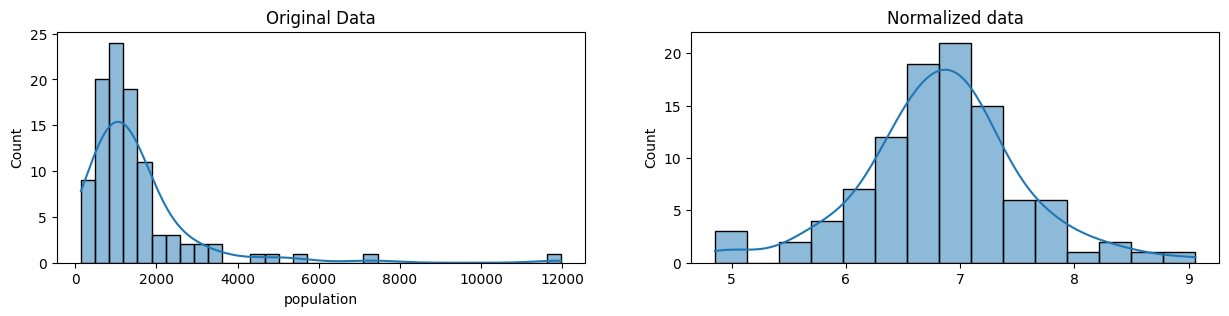

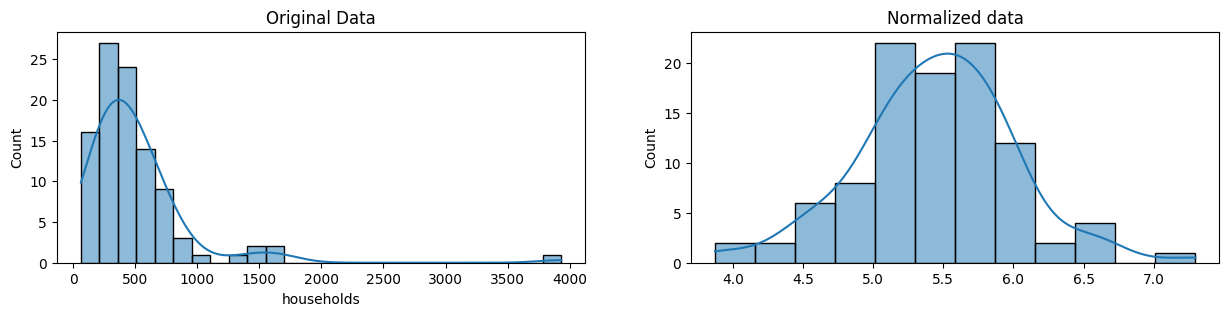

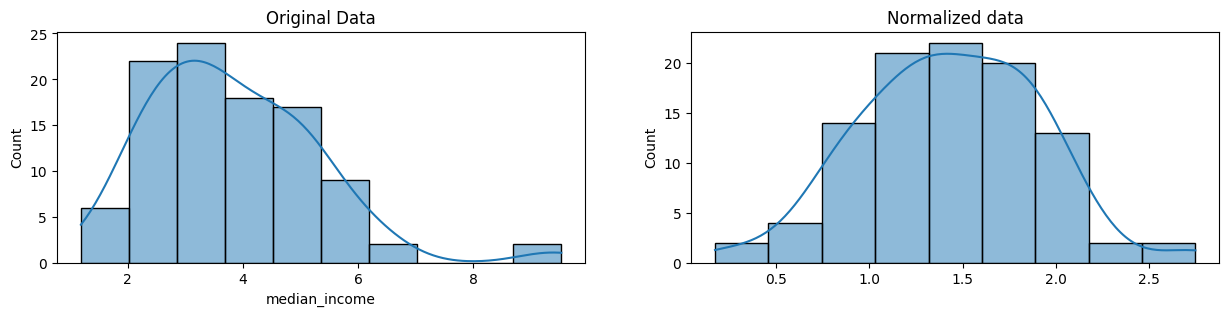

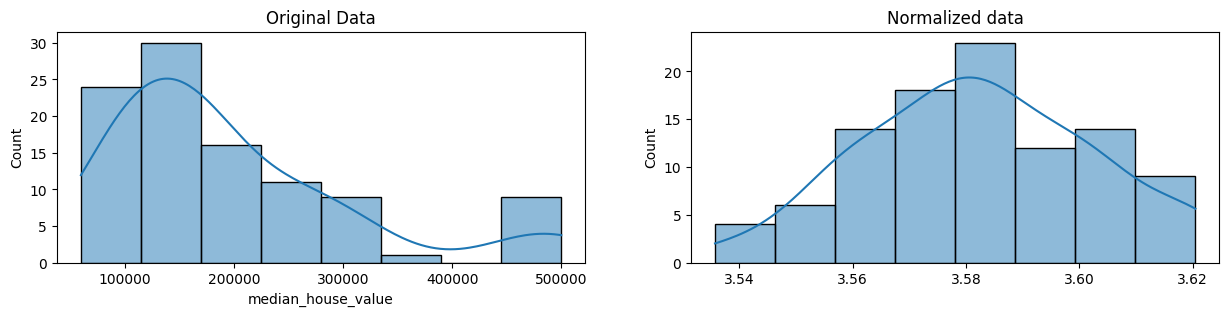

ValueError: Data must be positive.

In [68]:
for i in columns_with:
    original_data = immo_with_imputation[i].sample(n=100, random_state = 1)
    normalized_data = stats.boxcox(original_data)

    # plot both together to compare
    fig, ax=plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Normalized data")
    plt.show()

--- With the scaling method we can see they're outliers, i'm going to take off the outliers. 
The features: 'total_rooms', 'population' and 'median_income' follow a bell curve. The features:'households', 'total_bedrooms',and 'median_house_value' also follow a bell curve but not totally.
The feature 'housing_median_age' doesn't follow the bell curve.

Now i want to do some visualization to see witch features i'll choose. ---

# Visualization

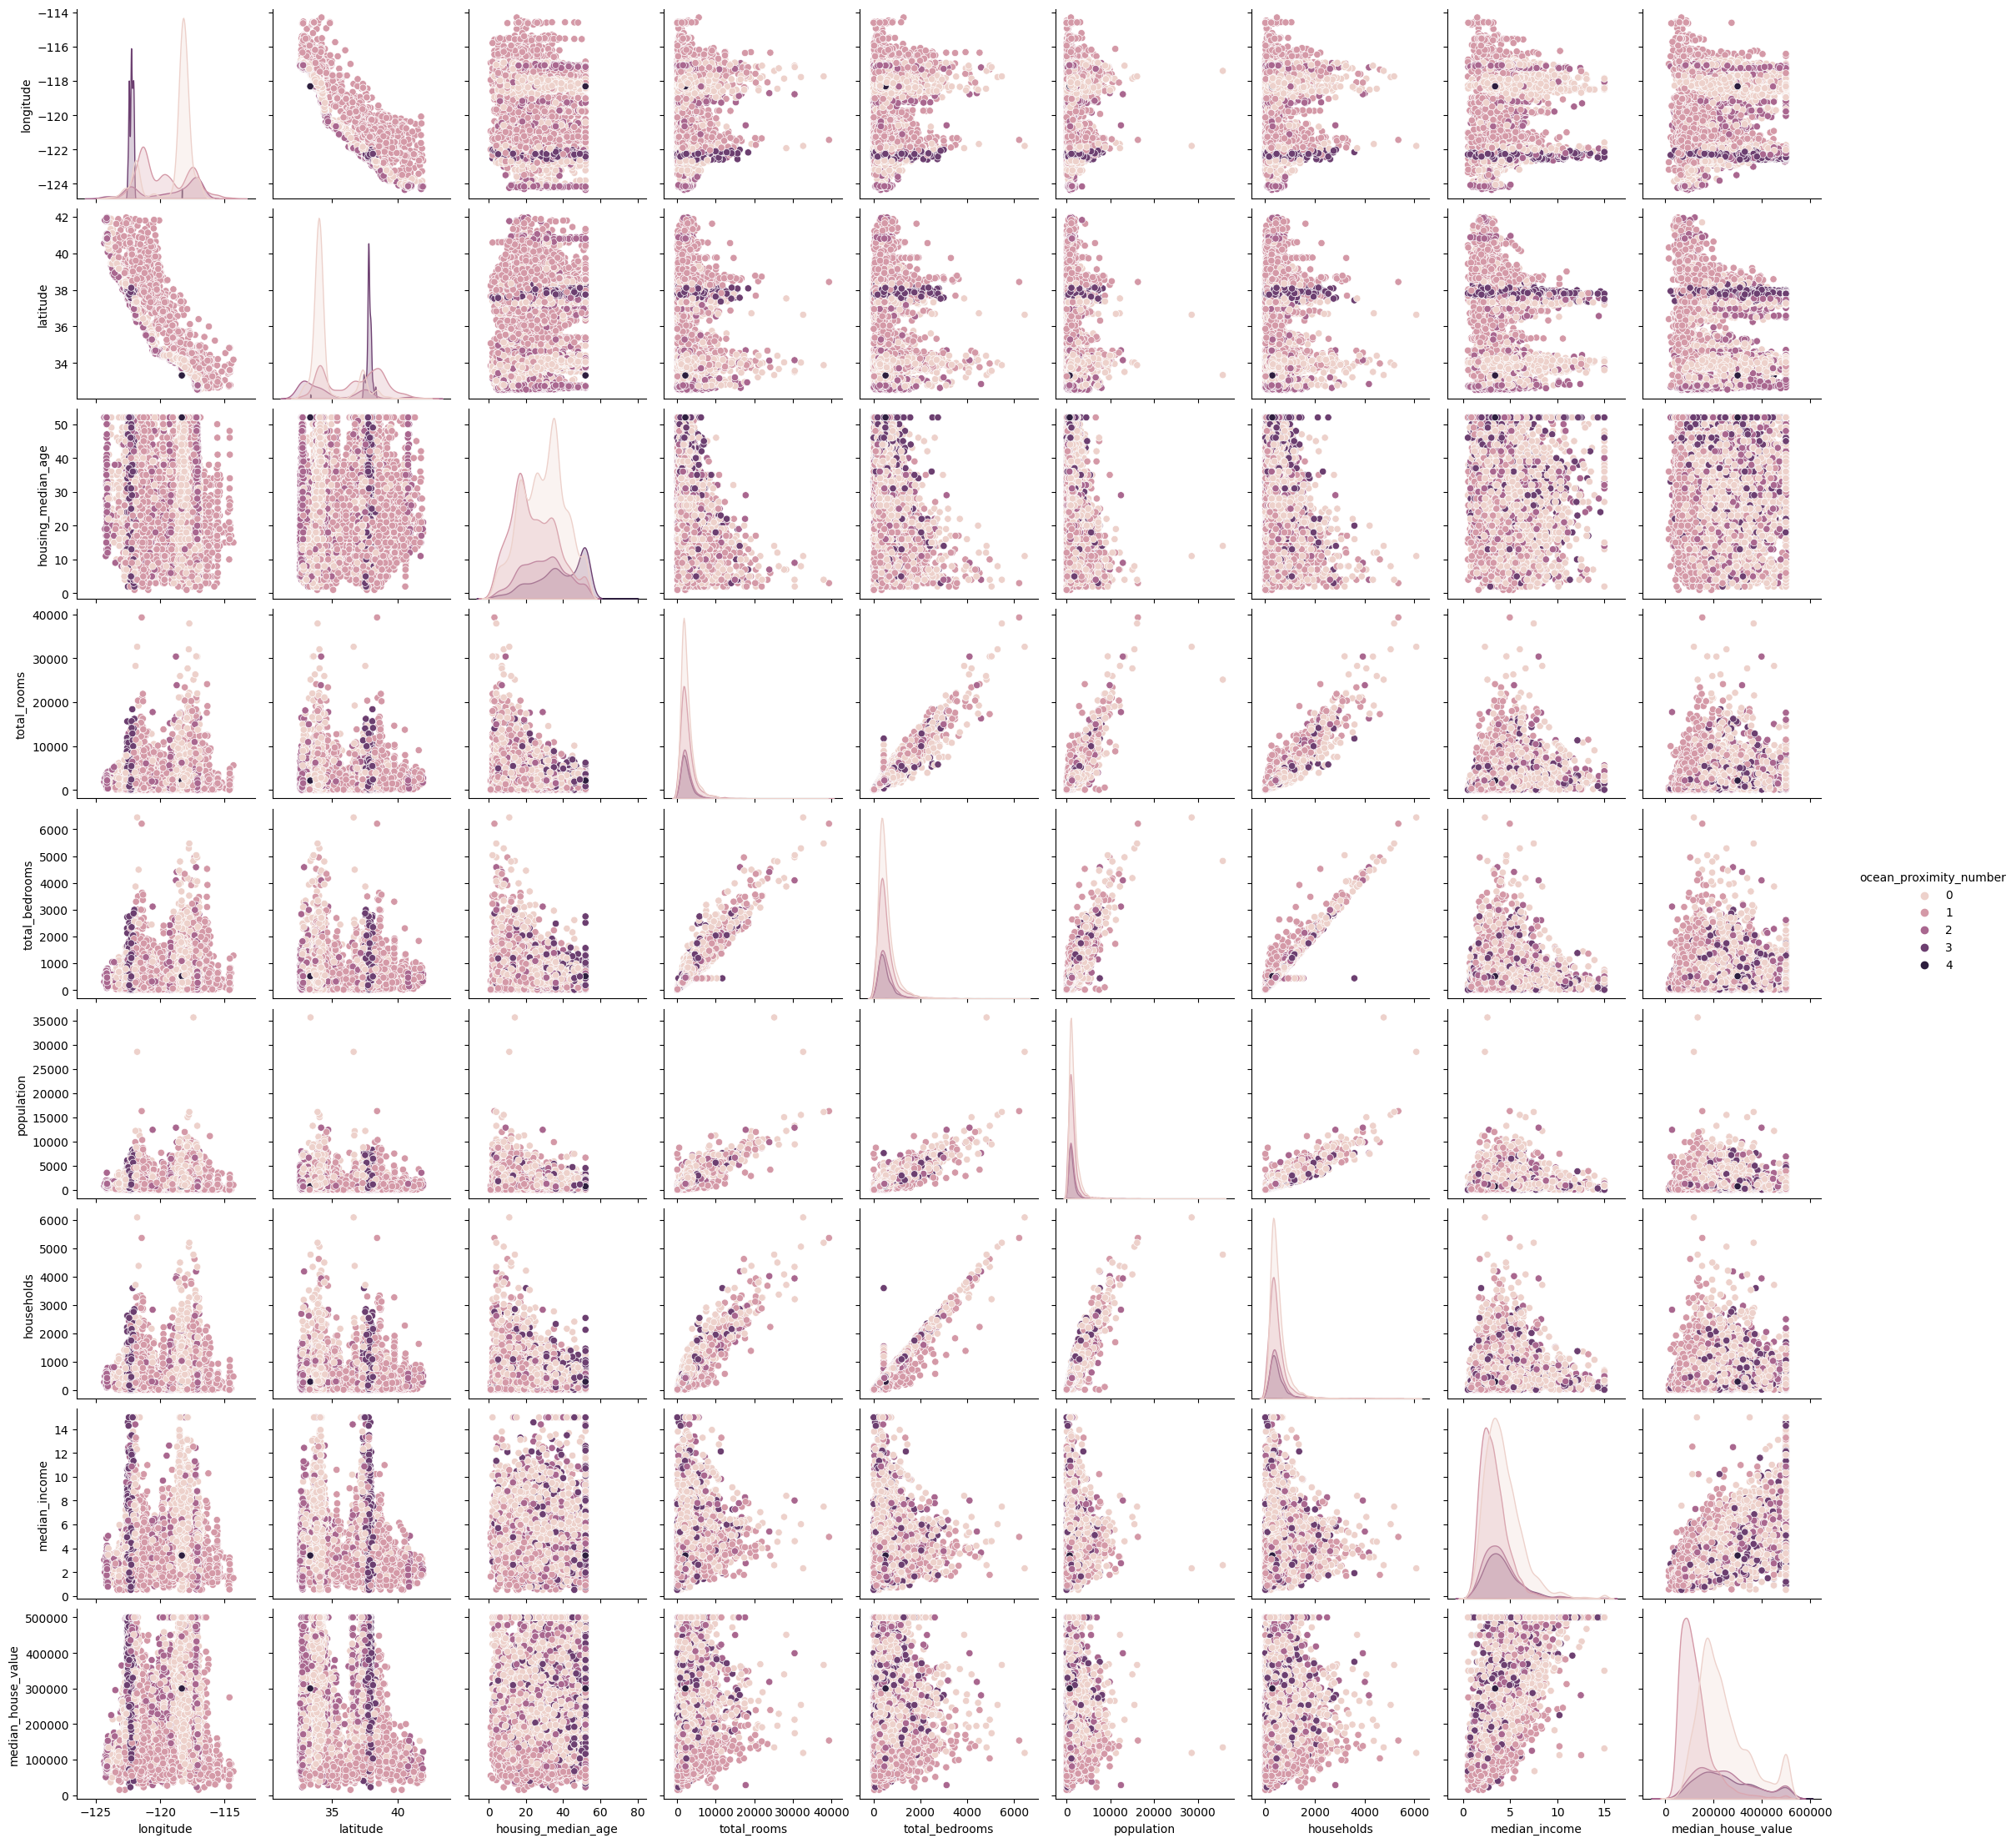

In [81]:
sns.pairplot(data=immo,hue="ocean_proximity_number")

In [ ]:
#sns.pairplot(data=immo_with_imputation,hue="ocean_proximity_number")

--- In this pairplot we can see with the features 'longitude' and 'latitude' the shape of california.
The features 'household', 'population','total_bedrooms' and 'total_rooms' are correlated. ---

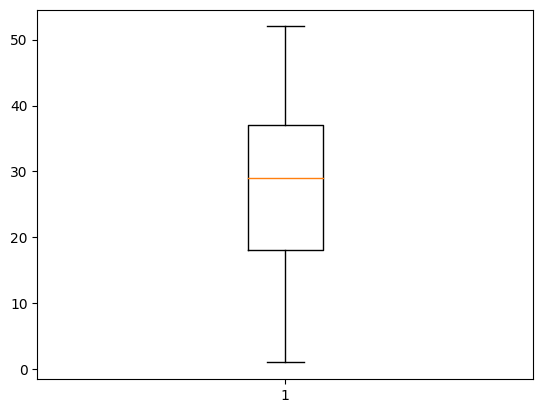

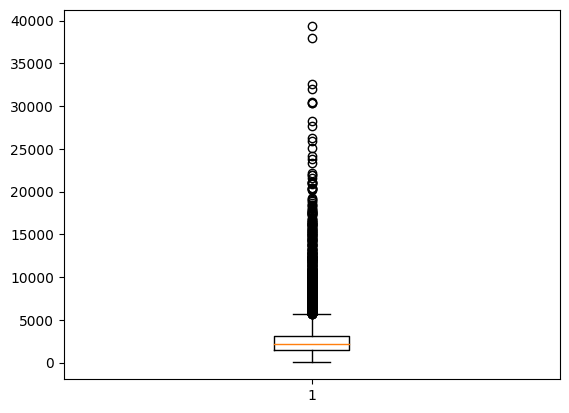

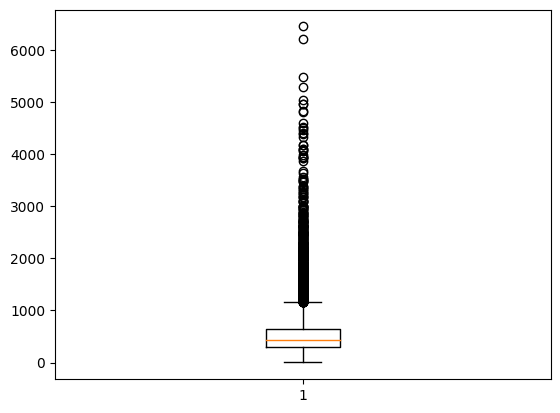

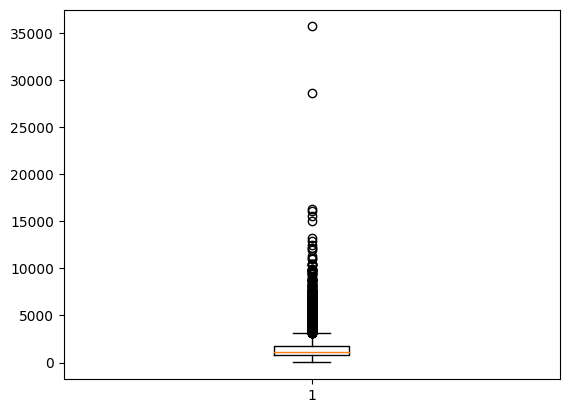

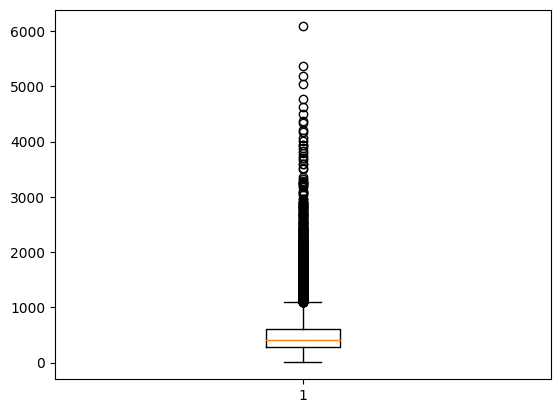

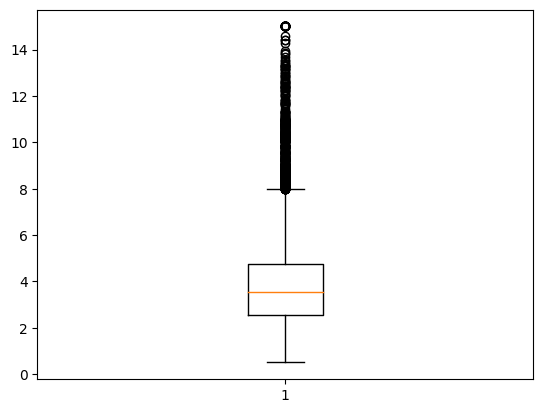

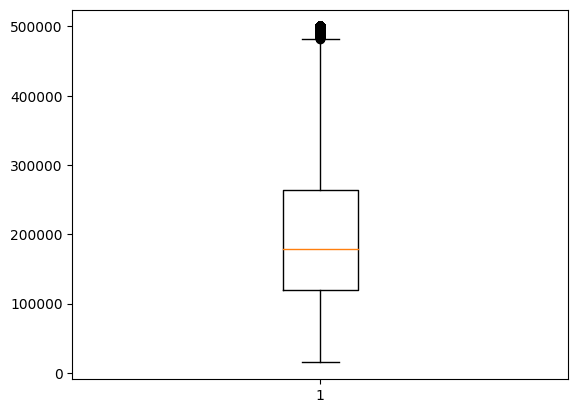

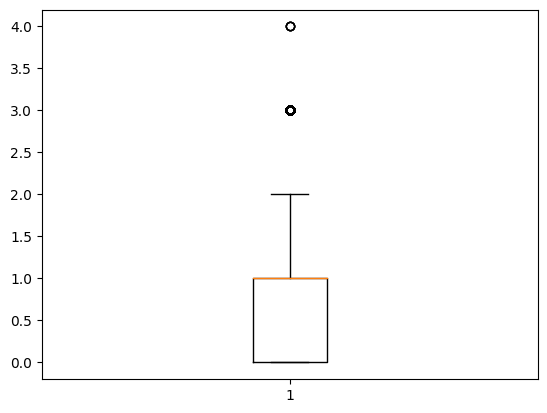

In [69]:
for i in columns:
    plt.boxplot(x=i, data=immo)
    plt.show()

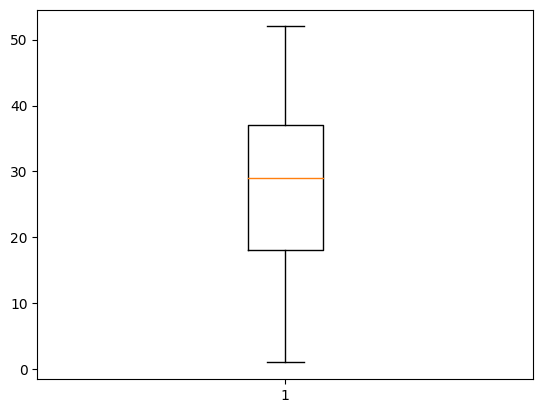

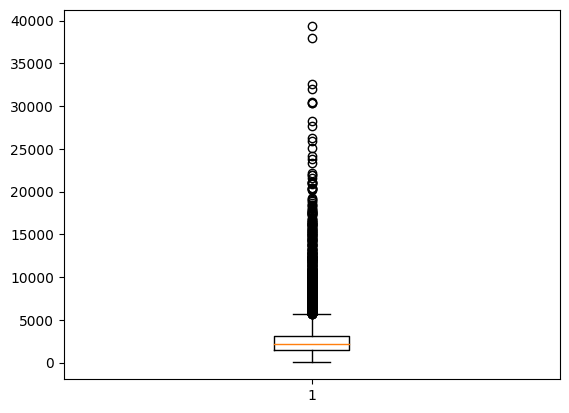

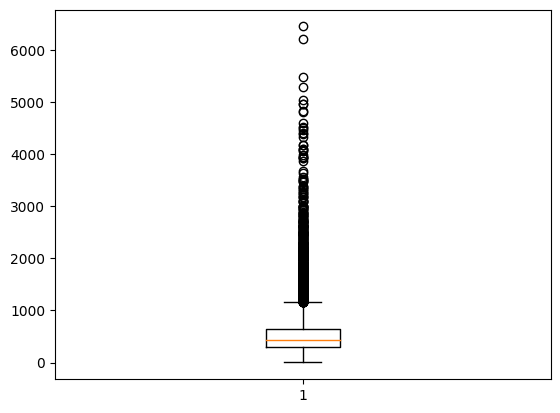

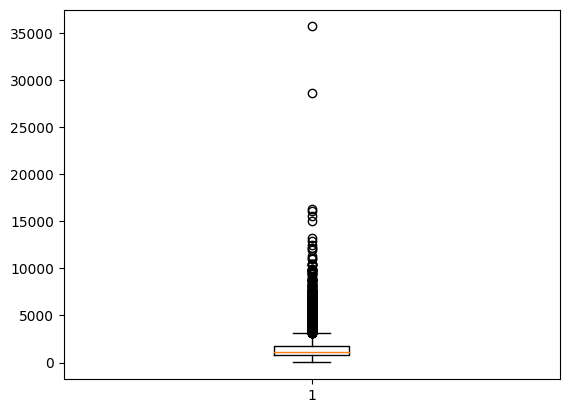

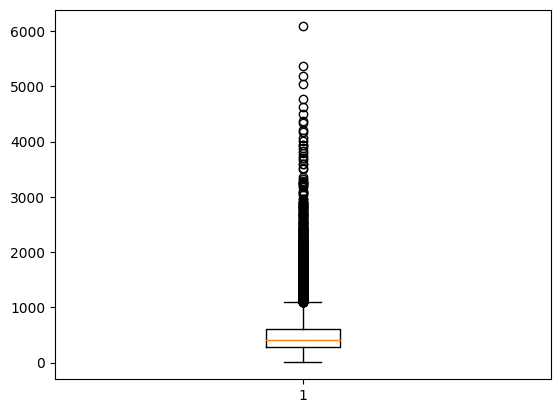

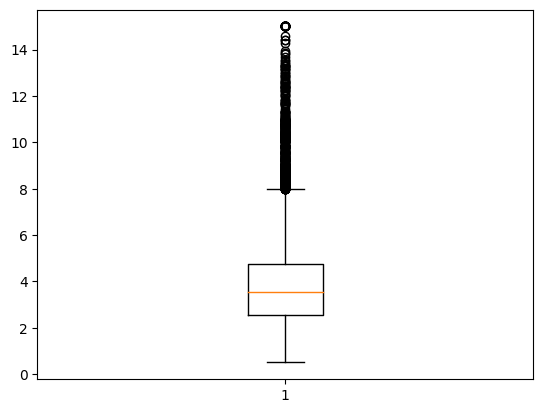

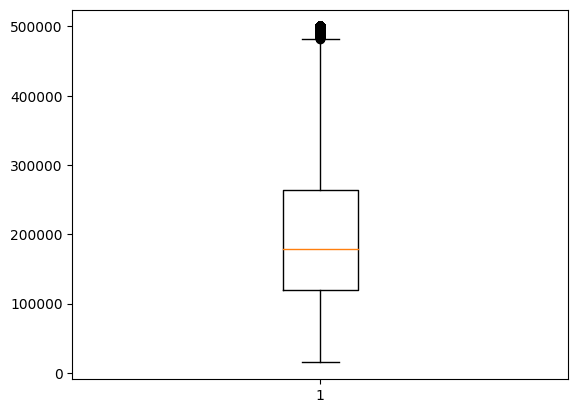

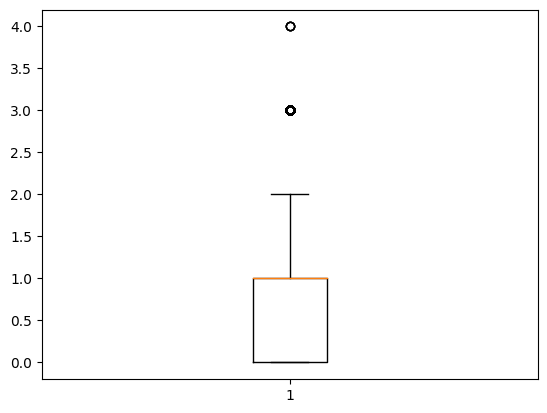

In [70]:
for i in columns_with:
    plt.boxplot(x=i, data=immo_with_imputation)
    plt.show()

--- The boxplot shows the features's outliers and mean. So after i should take off the outliers. ---

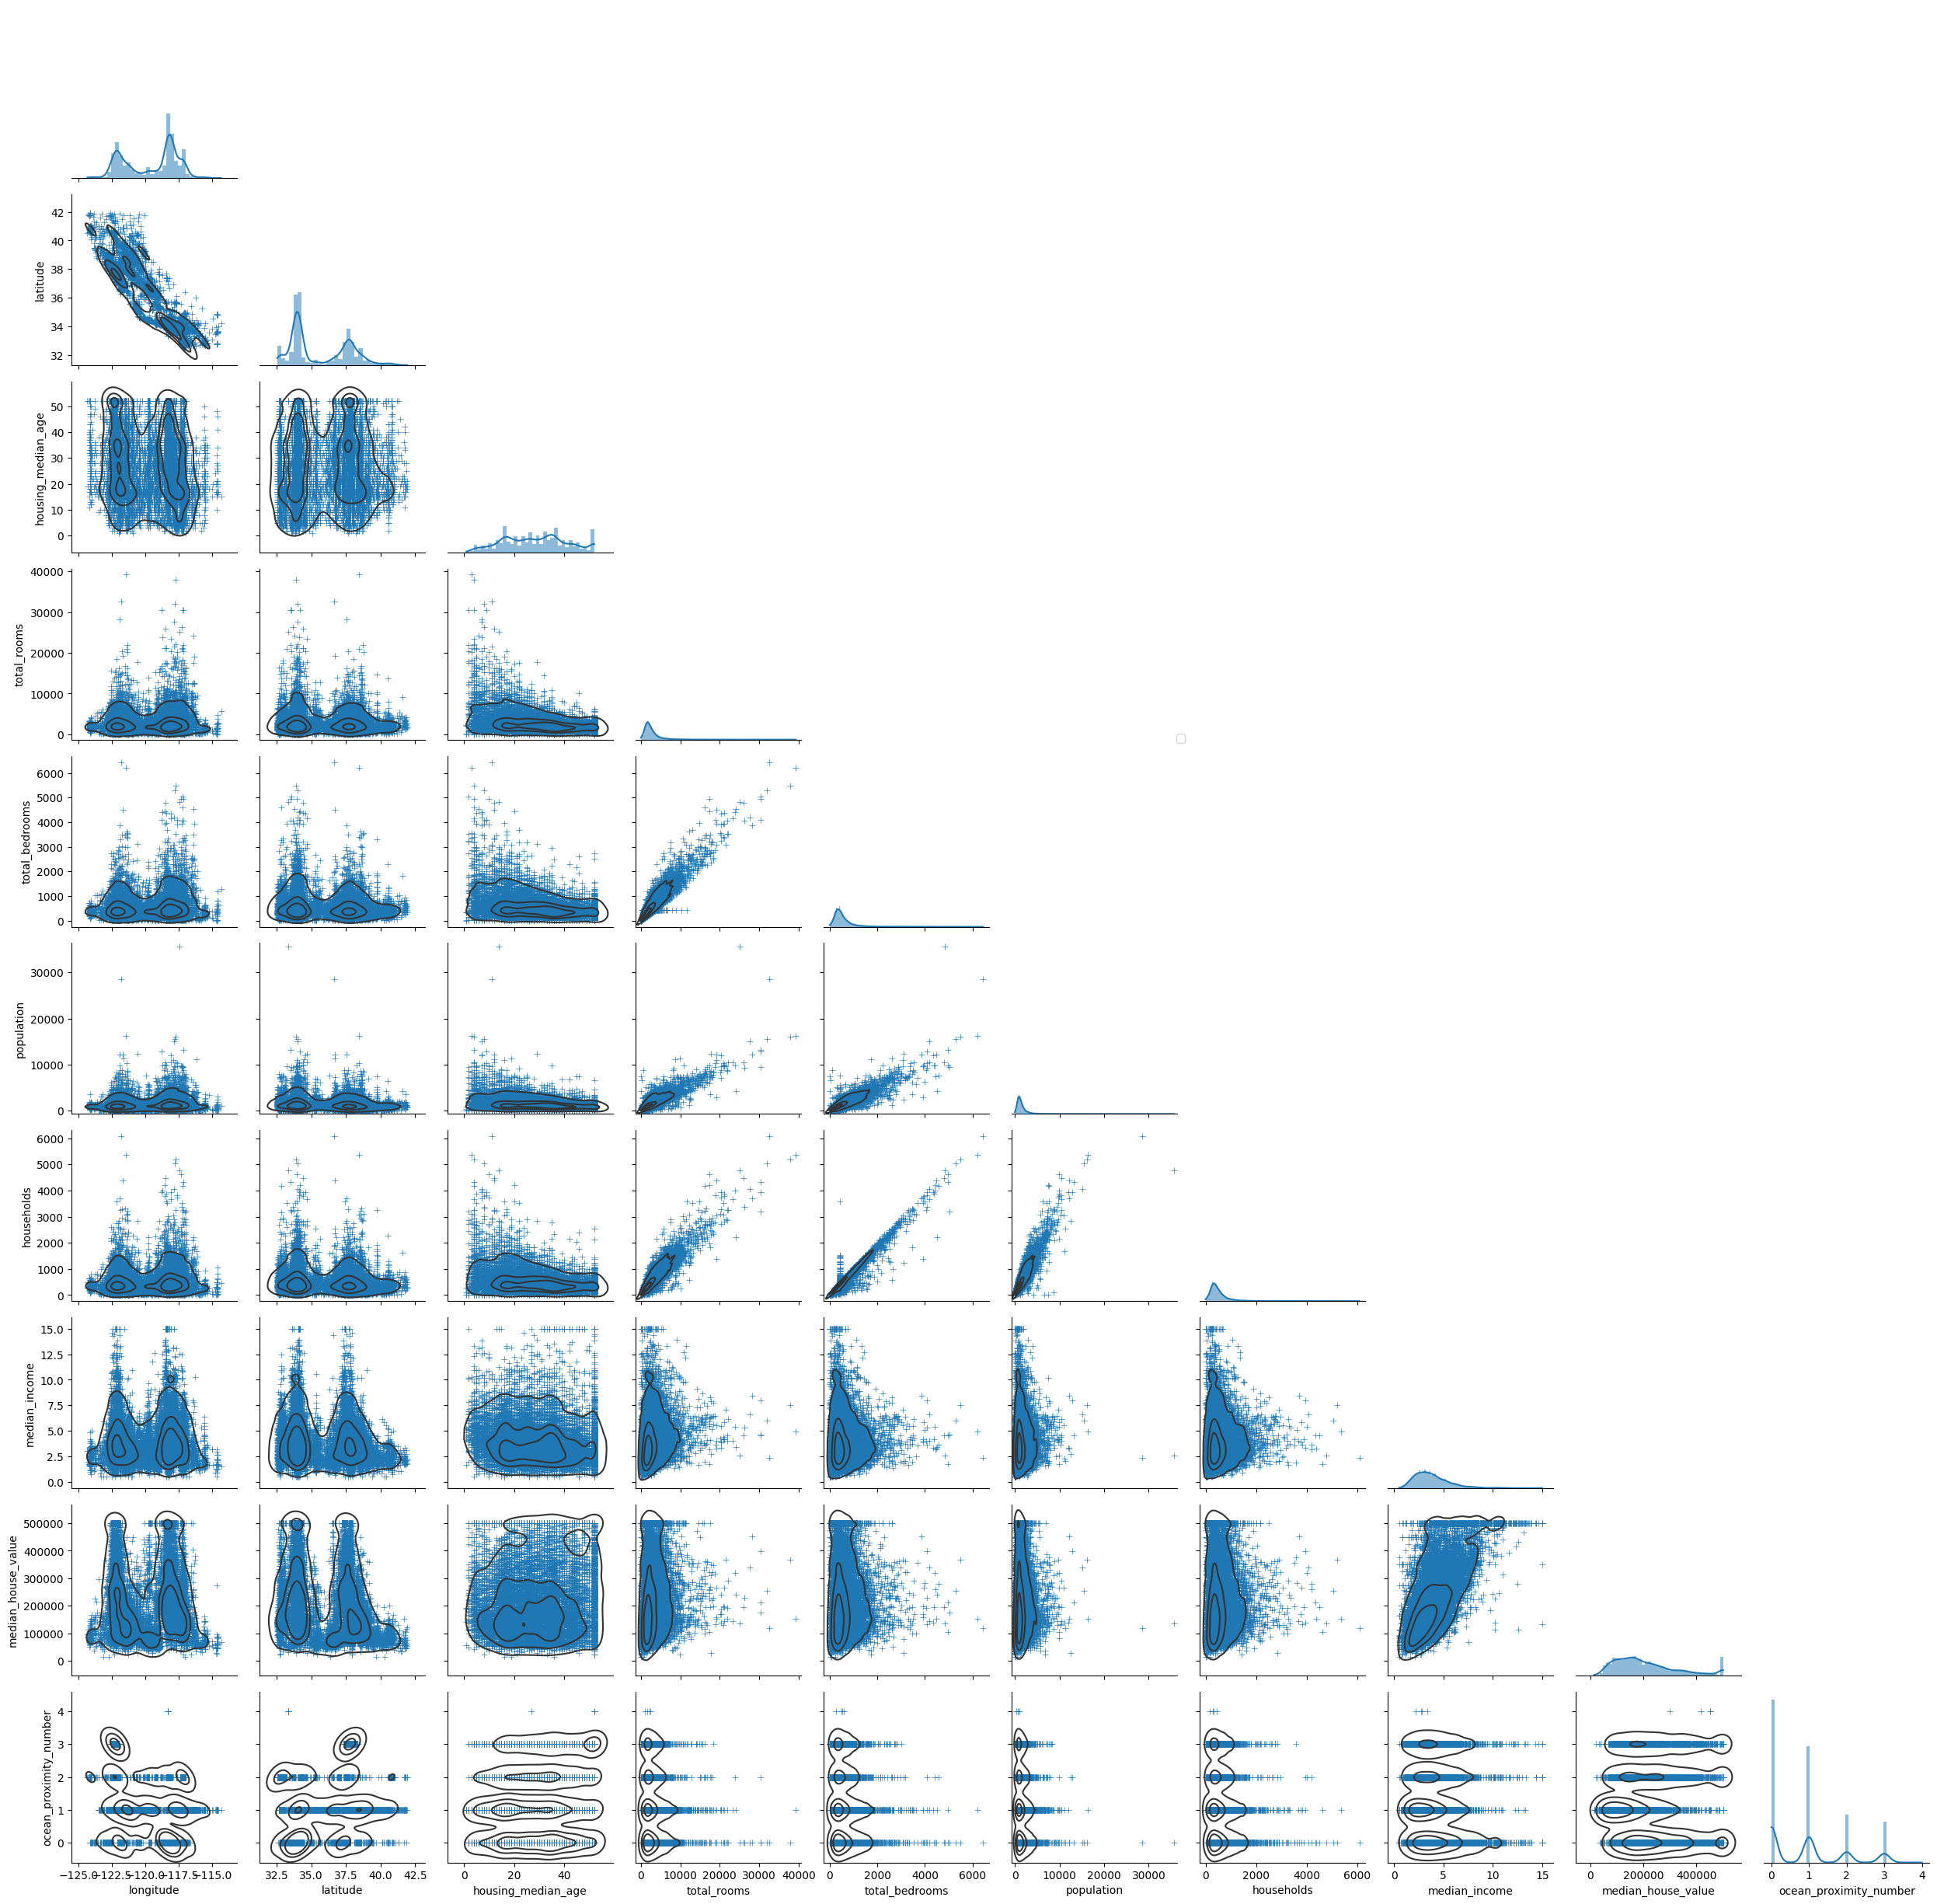

In [82]:
g = sns.PairGrid(data = immo,corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [ ]:
# g = sns.PairGrid(data = immo_with_imputation,corner = True)
# g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
# g.map_lower(sns.scatterplot, marker = "+")
# g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
# g.add_legend(frameon=True)
# g.legend.set_bbox_to_anchor((.61,.6))

--- Here the features 'household', 'population','total_bedrooms' and 'total_rooms' are correlated as we could see in the pairplot, we can also see the outliers and the distribution the 5th categories.  ---

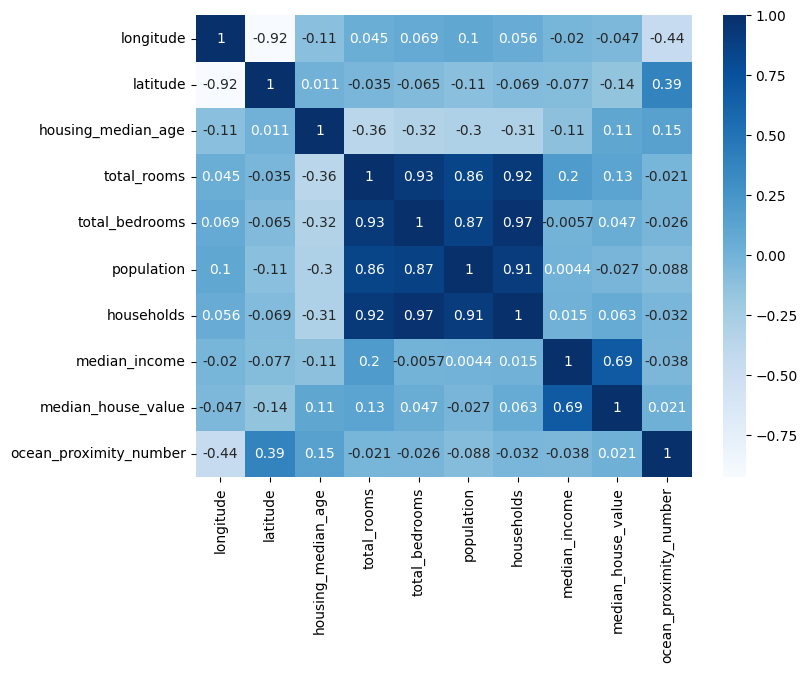

In [71]:
corr_df = immo.corr(method='pearson')

#plt.matshow(corr_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap=plt.cm.Blues)
plt.show()

--- This hit map shows all the positive and negative correlation, it's the same as we saw before, we can add to our exploration the feature 'median_house_value'. ---

# Outliers

In [23]:
for i in columns:
    # On récupère la colonne price sous la forme d'une serie Pandas
    tot_dt = immo[i]

    # On écrit une fonction qui va lister les prix considérés comme outliers
    outliers=[]
    def detectOutlier(data):
        threshold=2
        mean = np.mean(data)
        std =np.std(data)

        for i in data:
            z_score = (i - mean)/std
            if np.abs(z_score) > threshold:
                outliers.append(i)
        return outliers

    # On observe
    tot_dt_Outliers = detectOutlier(tot_dt)
    print("Nombre d'outliers détectés => " + str(len(tot_dt_Outliers)))
    #print(priceOutliers)

Nombre d'outliers détectés => 101
Nombre d'outliers détectés => 595
Nombre d'outliers détectés => 652
Nombre d'outliers détectés => 590
Nombre d'outliers détectés => 646
Nombre d'outliers détectés => 685
Nombre d'outliers détectés => 1098


In [24]:
# On récupère la colonne price sous la forme d'une serie Pandas
tot_dt = immo['median_house_value']

# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(data):
    threshold=2
    mean = np.mean(data)
    std =np.std(data)

    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# On observe
tot_dt_Outliers = detectOutlier(tot_dt)
print("Outliers detected => " + str(len(tot_dt_Outliers)))
print(sorted(tot_dt_Outliers))

Outliers detected => 1098
[437100.0, 437400.0, 437400.0, 437500.0, 437900.0, 438000.0, 438000.0, 438100.0, 438300.0, 438400.0, 438400.0, 438500.0, 438500.0, 438900.0, 439100.0, 439100.0, 439800.0, 439900.0, 440000.0, 440300.0, 440500.0, 440900.0, 441000.0, 441100.0, 441400.0, 441400.0, 441700.0, 441700.0, 441900.0, 442000.0, 442100.0, 442100.0, 442100.0, 442500.0, 442700.0, 442900.0, 442900.0, 443000.0, 443300.0, 443300.0, 443600.0, 443800.0, 443800.0, 443900.0, 444100.0, 444100.0, 444200.0, 444300.0, 444400.0, 444500.0, 444500.0, 444700.0, 445000.0, 445400.0, 445600.0, 445700.0, 445700.0, 445900.0, 446000.0, 446200.0, 446200.0, 446600.0, 446600.0, 446700.0, 446800.0, 446800.0, 446900.0, 447100.0, 447300.0, 447400.0, 447400.0, 447700.0, 448100.0, 448300.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450

In [74]:
percent_missing = (1098/total_cells) * 100
print(percent_missing)

0.6649709302325582


--- Now we have the numbers of outliers in the features 'median_house_value' and we know the impact in percent: 0.6%, so we can delete them. ---

In [25]:
df_immo_without_outliers = immo.loc[immo['median_house_value'] < 437100.0]

In [26]:
df_immo_without_outliers

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  
0          1397.0       417.0         1.4817             72000.0  
1           862.0       340.0         6.9133            274100.0  
2           931.0       214.0         1.5536             58300.0  
3           597.0       227.0         1.5284            200000.0  
4          1130.0       372.0         4.0815            117900.0  
...           ...         ...            ...                 ...  
16507       745.0       250.0         3.0625             93800.0  
16508      1131.0       458.0         2.6133            103100.0  
16509      1206.0       429.0         4.4958            192600.0  
16510      2546.0       773.0         2.5750            153500.0  
16511      1259.0       420.0         2.2478             81100.0  

[15414 rows x 9 columns]

In [27]:
df_immo_imput_without_outliers = immo_with_imputation.loc[immo_with_imputation['median_house_value'] < 437100.0]

In [28]:
df_immo_imput_without_outliers

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  
0          1397.0       417.0         1.4817             72000.0  
1           862.0       340.0         6.9133            274100.0  
2           931.0       214.0         1.5536             58300.0  
3           597.0       227.0         1.5284            200000.0  
4          1130.0       372.0         4.0815            117900.0  
...           ...         ...            ...                 ...  
16507       745.0       250.0         3.0625             93800.0  
16508      1131.0       458.0         2.6133            103100.0  
16509      1206.0       429.0         4.4958            192600.0  
16510      2546.0       773.0         2.5750            153500.0  
16511      1259.0       420.0         2.2478             81100.0  

[15414 rows x 9 columns]

--- Extract and test with a basline model---

In [92]:
df_immo_imput_without_outliers.to_csv('immo_with_imput.csv')

In [93]:
df_immo_without_outliers.to_csv('immo.csv')

In [94]:
immo.to_csv('immo_with_outliers.csv')

In [95]:
immo_with_imputation.to_csv('immo_with_outliers_and_imput.csv')

# One Hot

--- As i said in the notebook model, i'll keep the outliers but now i'll change the column 'ocean_proximity_number'.
I'll split it in 5 columns: '<1H OCEAN': 0,'INLAND': 1,'NEAR OCEAN': 2,'NEAR BAY': 3,'ISLAND': 4.---

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
def Iteration(data):
    #imputation
    data = data.fillna(data['total_bedrooms'].median())
    #encoding
    enc = OneHotEncoder(sparse=False).fit(data[['ocean_proximity']])
    encoded = enc.transform(data[['ocean_proximity']])
    encoded_df = pd.DataFrame(encoded, columns = enc.get_feature_names_out())
    data_df = pd.concat([data, encoded_df], axis = 1)
    final_df = data_df.drop(['ocean_proximity'], axis = 1)
    return final_df

In [12]:
one_hot_iteration = Iteration(data_immo)

In [14]:
one_hot_iteration.to_csv('one_hot_iteration.csv')

# New Imputation

## mean

In [ ]:
without_unnamed["total_bedrooms"].median()
data_immo_with_imputation['total_bedrooms'] = without_unnamed.total_bedrooms.fillna(435.0)

In [15]:
def Iteration_mean(data):
    #imputation
    mean = data['total_bedrooms'].mean()
    data = data.fillna(mean)
    #encoding
    enc = OneHotEncoder(sparse=False).fit(data[['ocean_proximity']])
    encoded = enc.transform(data[['ocean_proximity']])
    encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
    data_df = pd.concat([data, encoded_df], axis = 1)
    final_df = data_df.drop(['ocean_proximity'], axis = 1)
    return final_df

In [16]:
by_mean_imput = Iteration_mean(data_immo)

In [18]:
by_mean_imput.to_csv('by_mean_imput.csv')

## Scikitlearn

# Log

# Discretizing

# Balanced